In [631]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



In [598]:
result_dir = Path("rl_result/timestep_10300/train")
security_path = result_dir / "TSMC.json"
agent_path = result_dir / "agent.json"
rl_path = result_dir / "rl.json"
tsmc = pd.read_json(security_path)

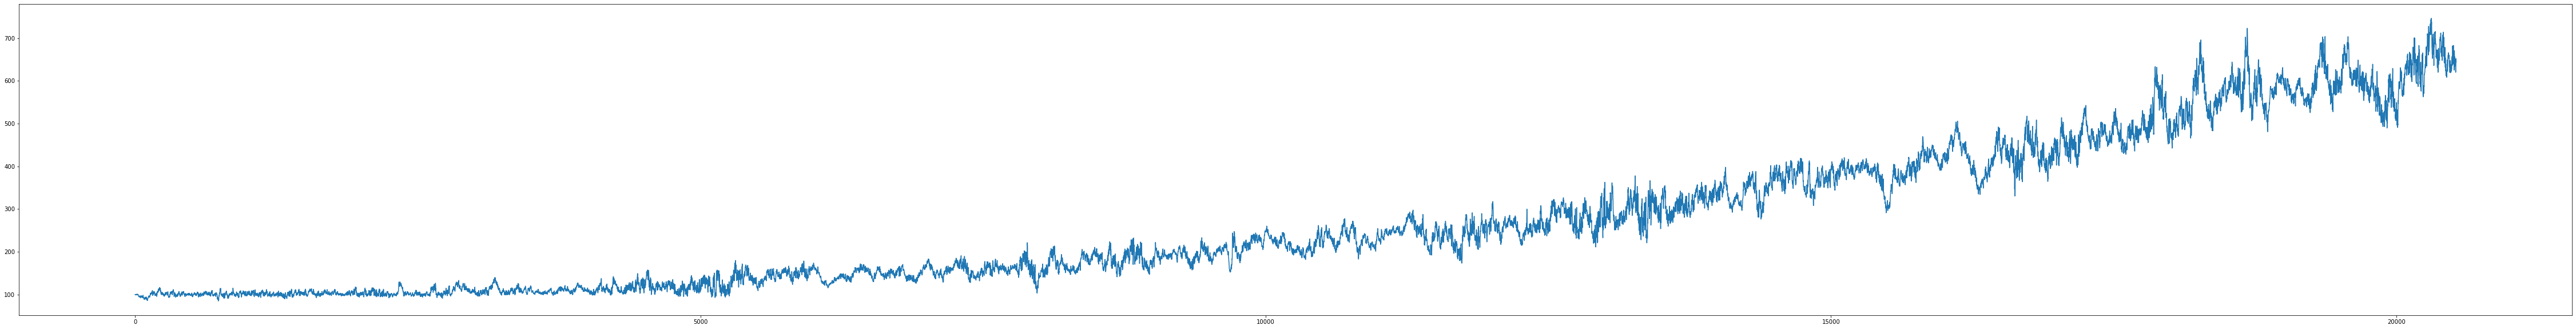

In [599]:
tsmc['average'].plot(figsize = (80, 10))

In [600]:
agent = pd.read_json(agent_path)

In [601]:
group_names = agent.columns
num_of_timesteps = len(agent[group_names[0]]['CASH'])
print(group_names)
print(agent[agent.columns[0]].index)

Index(['zi_1000', 'ra_1000', 'tr_100', 'mr_100', 'fu_100', 'rl_1'], dtype='object')
Index(['CASH', 'TSMC', 'WEALTH', 'initial_wealth_by_agent', 'returns_by_agent',
       'returns_by_step'],
      dtype='object')


In [602]:
# for the late enter of rl
for i in range(50):
    agent['rl_1']['WEALTH'].insert(0, agent['rl_1']['WEALTH'][0])


In [603]:
# normalize 
wealth = np.array([agent[group_name]['WEALTH'] for group_name in group_names])
std_wealth = (wealth - wealth[:, 0].reshape(-1, 1)) / wealth[:, 0].reshape(-1, 1)


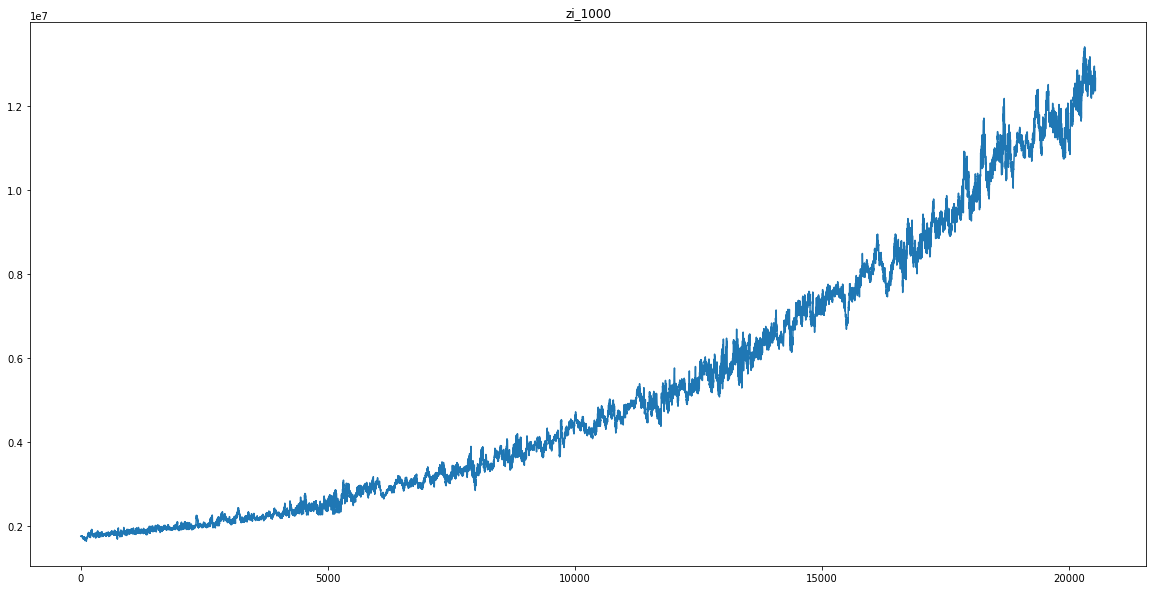

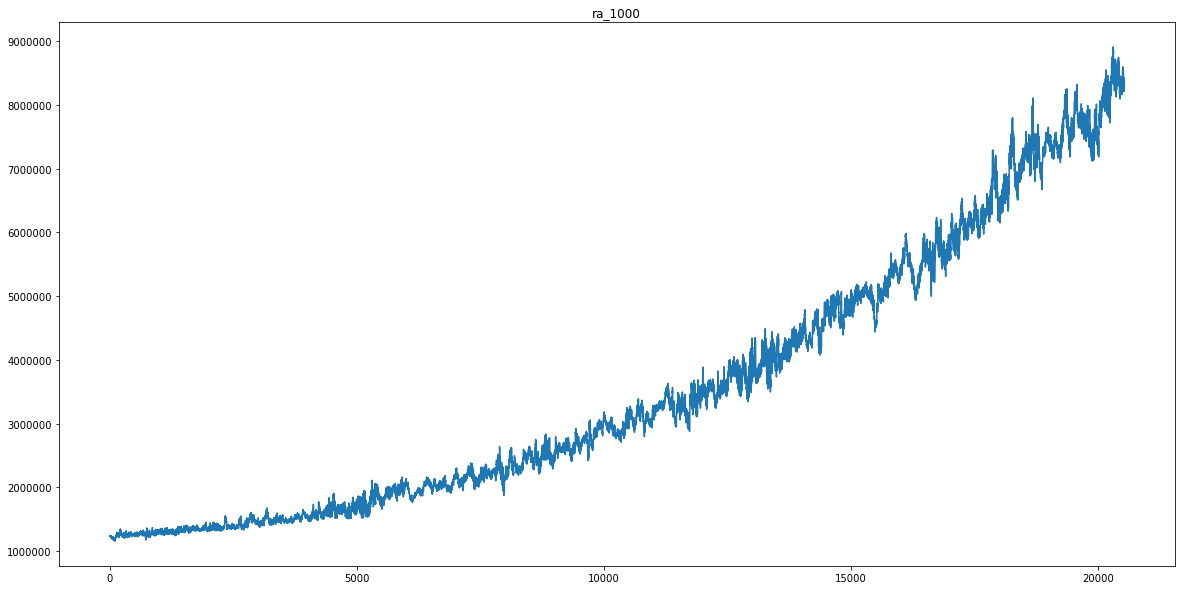

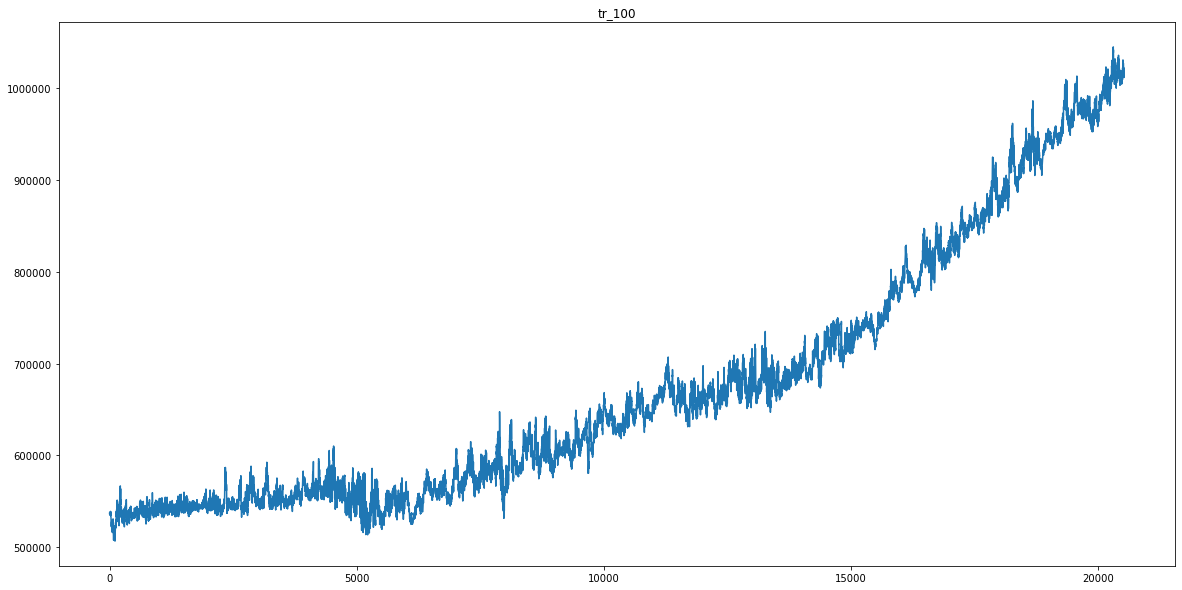

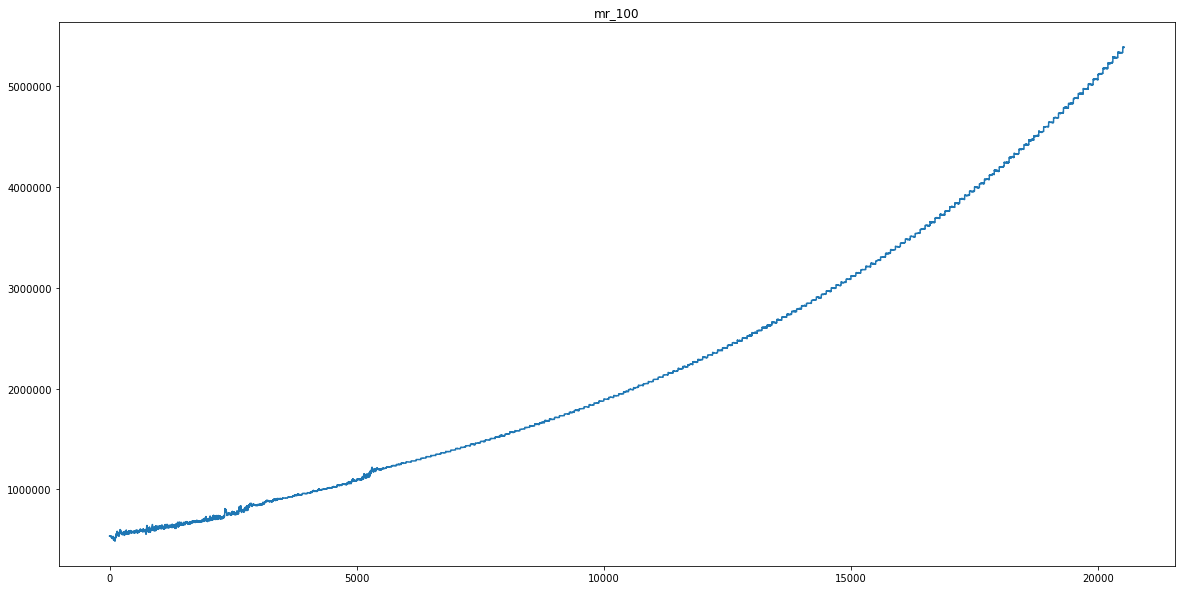

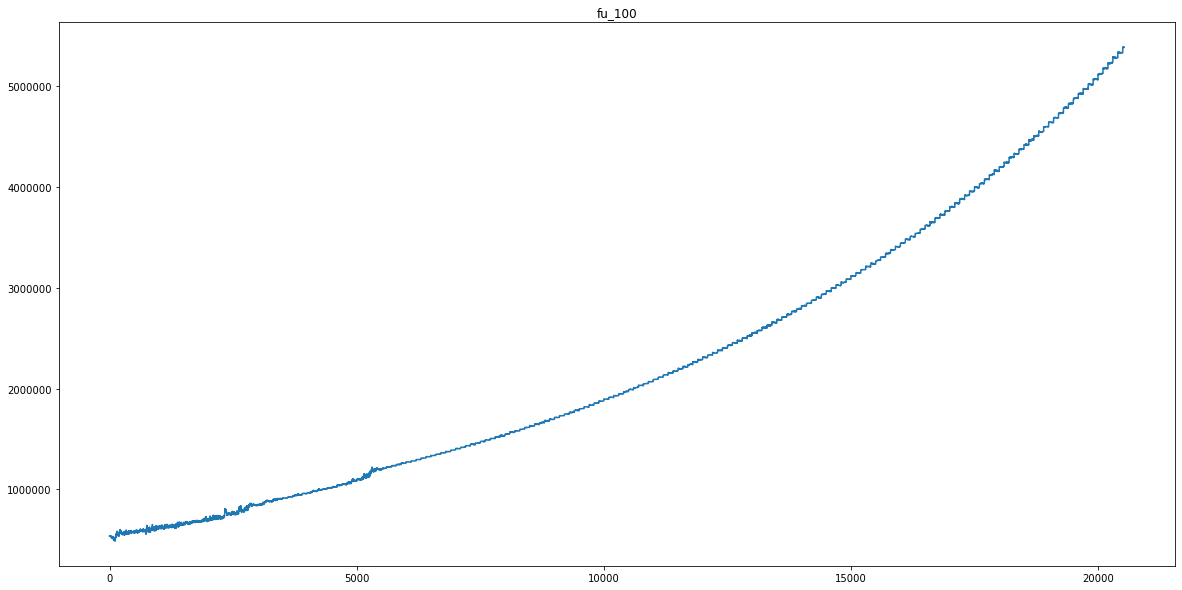

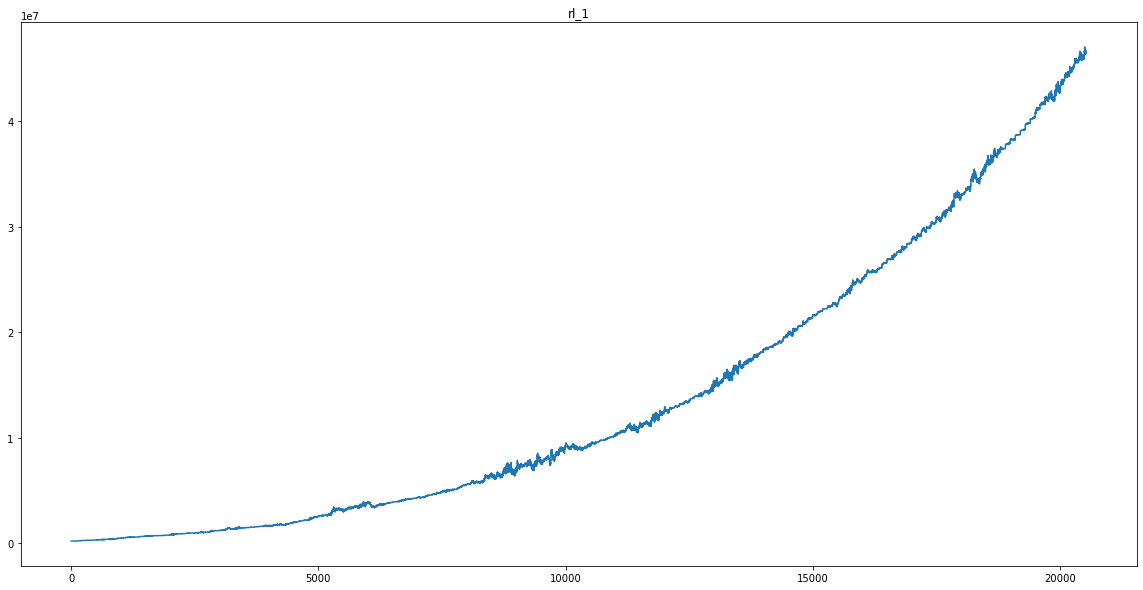

In [604]:
# for agent_type in agent.columns:
for group_name in agent.columns:
    plt.figure(figsize=(20, 10))
    plt.plot(agent[group_name]['WEALTH'])
    plt.title(group_name)
    plt.show()
# for i in range(len(agent.columns)):
#     plt.figure(figsize=(20, 10))
#     plt.plot(agent.iloc[:, i])
#     plt.title(agent.columns[i])
#     plt.show()

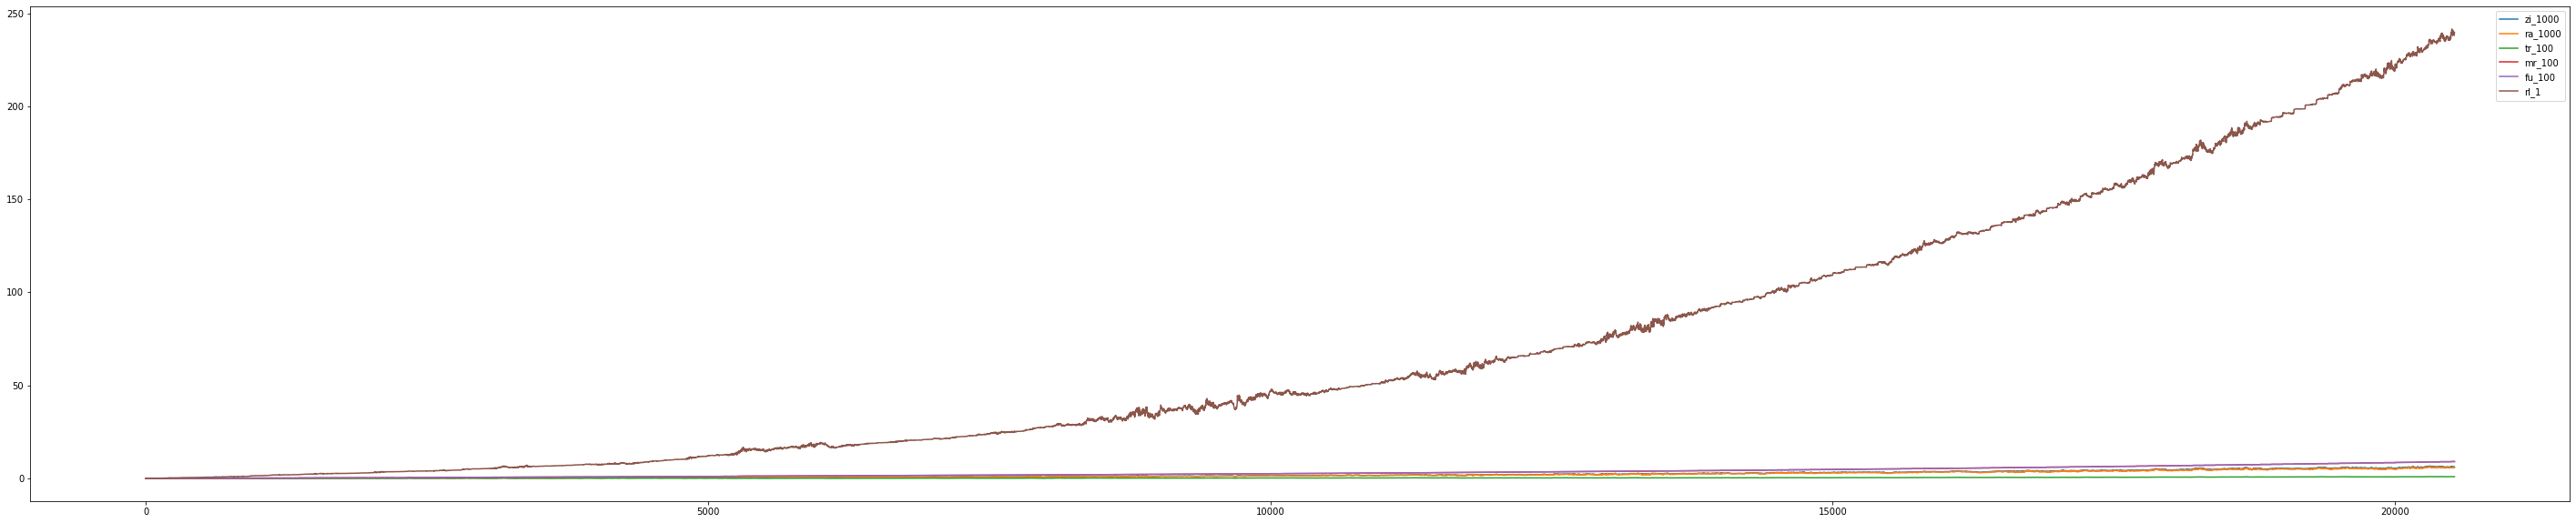

In [605]:
plt.figure(figsize=(50, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(std_wealth[i], label = group_names[i])
plt.legend()

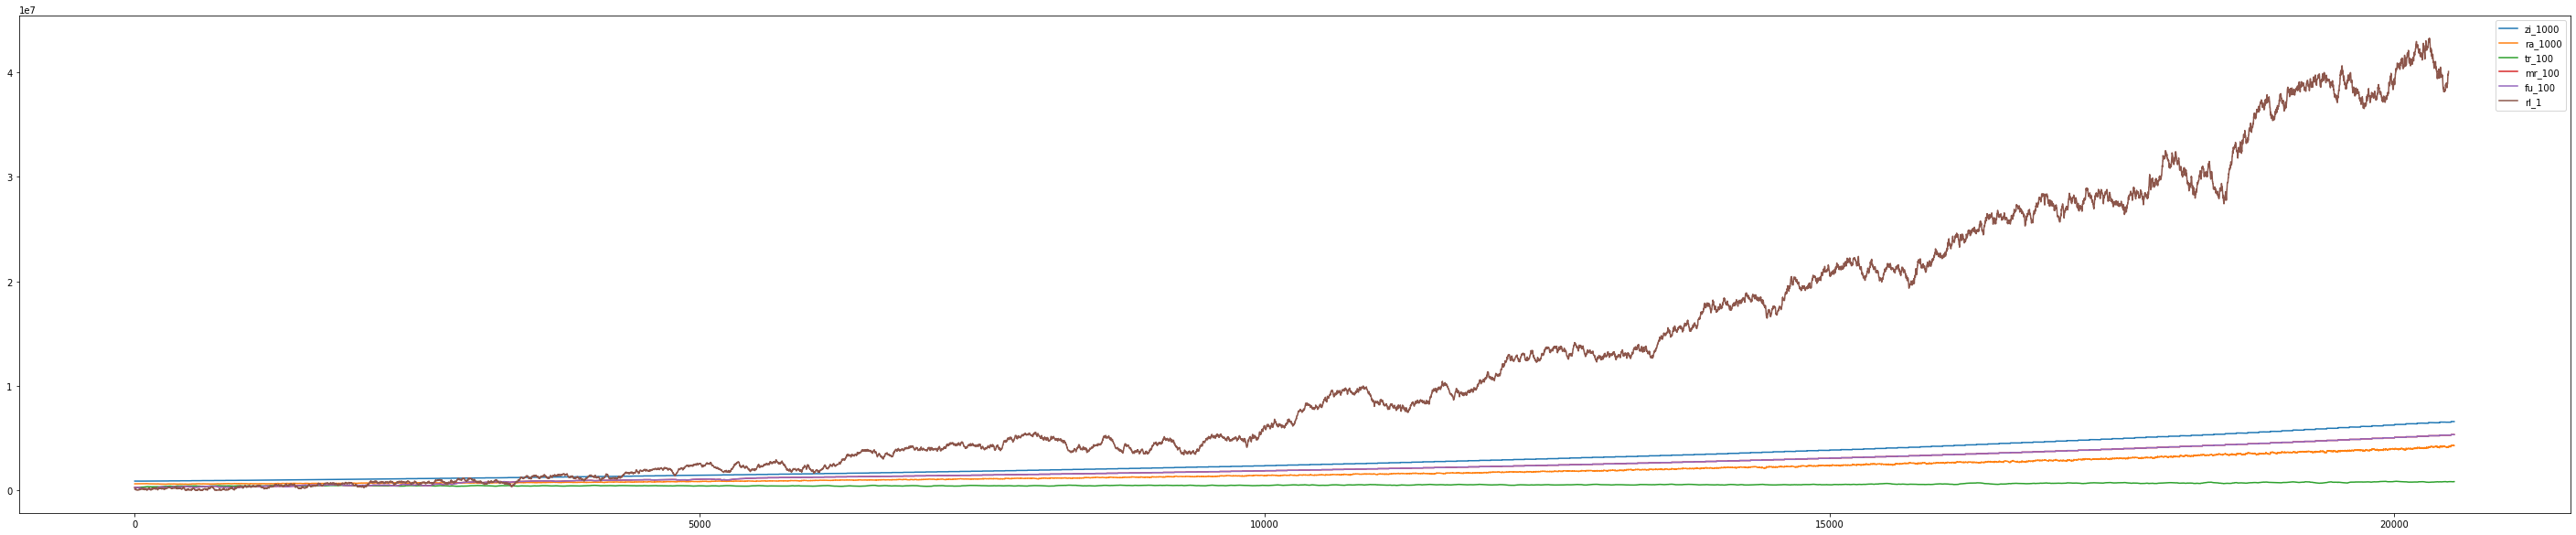

In [611]:
plt.figure(figsize=(50, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['CASH'], label = group_names[i])
plt.legend()

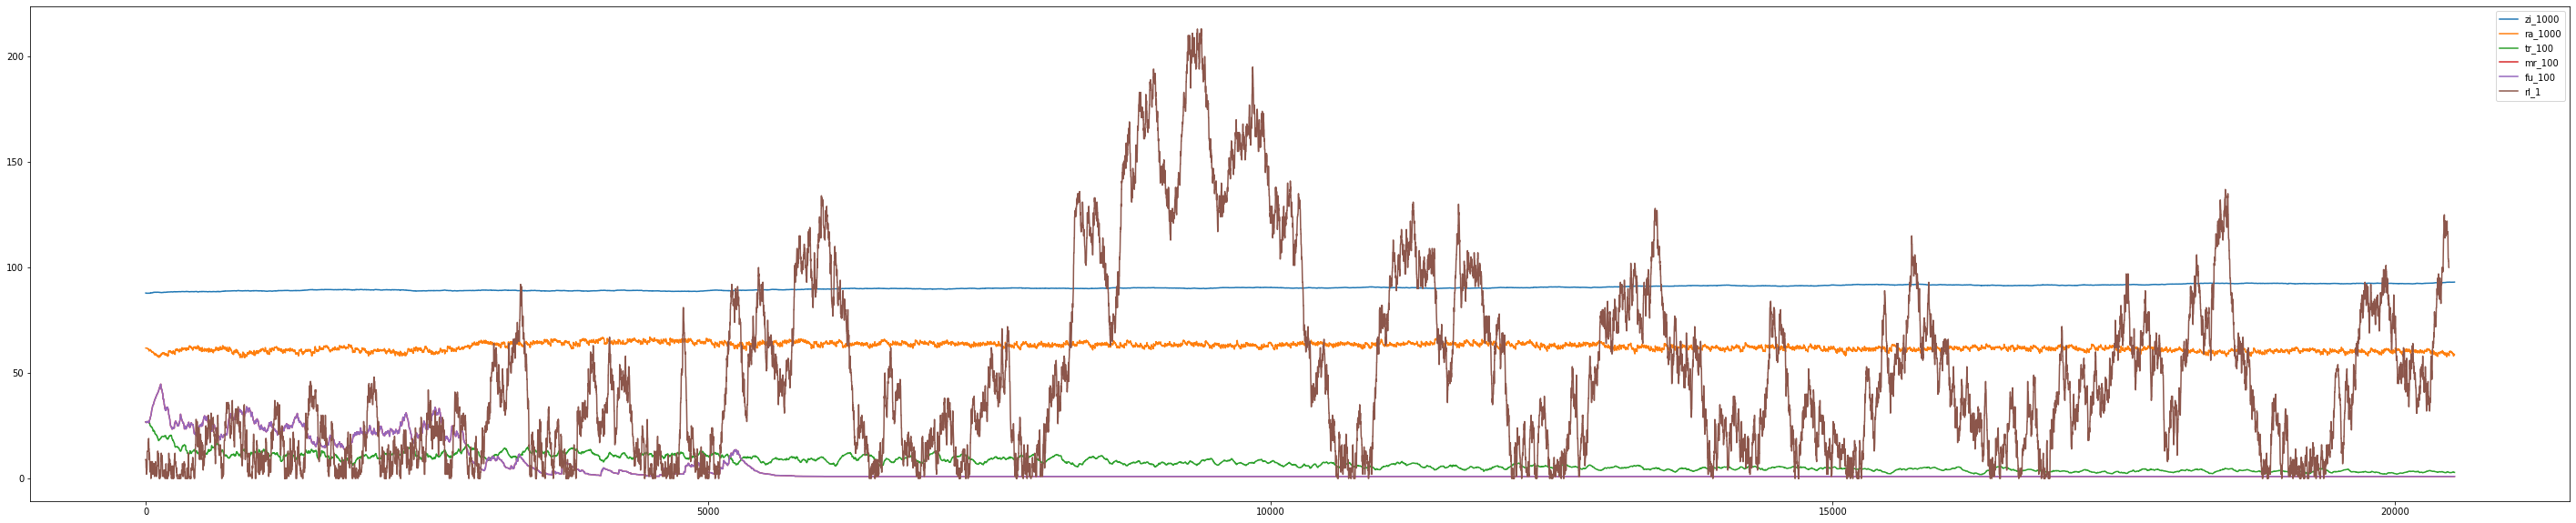

In [612]:
plt.figure(figsize=(50, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['TSMC'], label = group_names[i])
plt.legend()

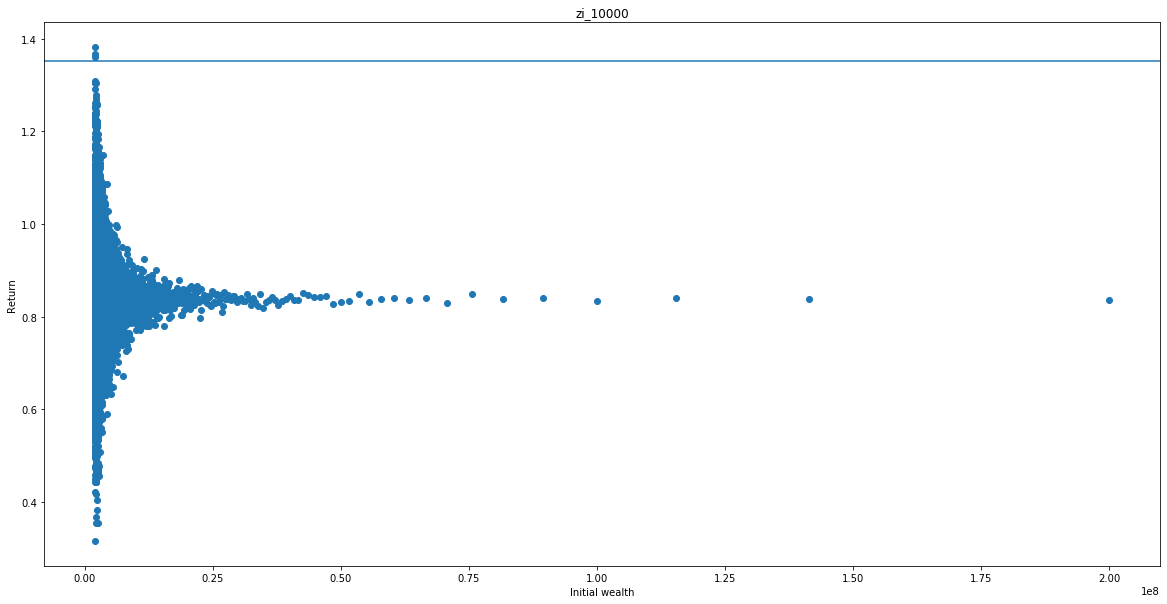

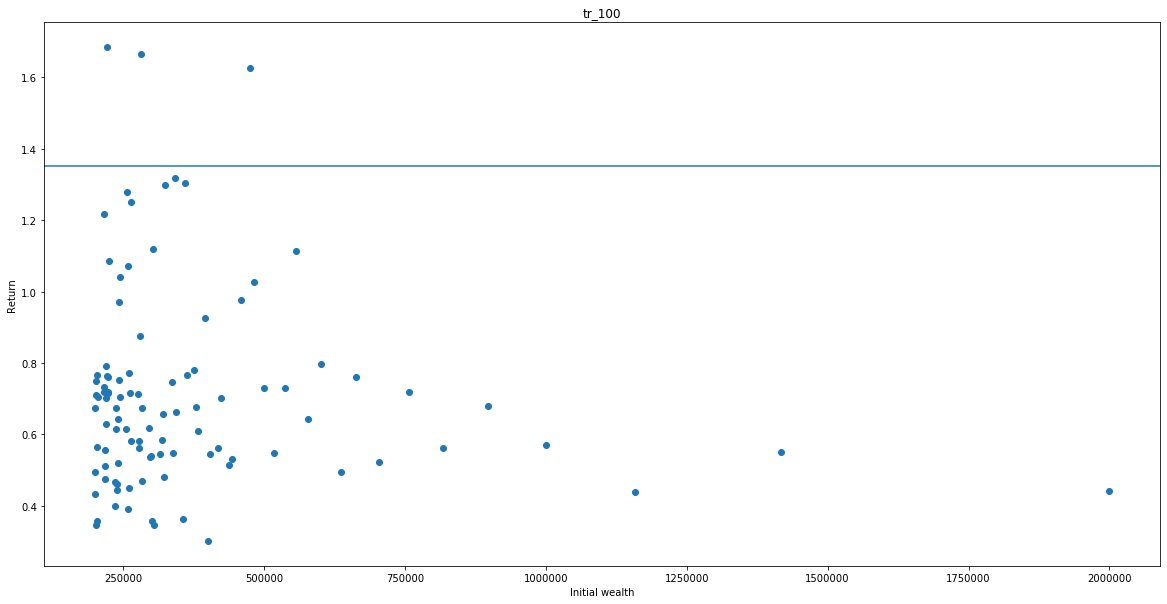

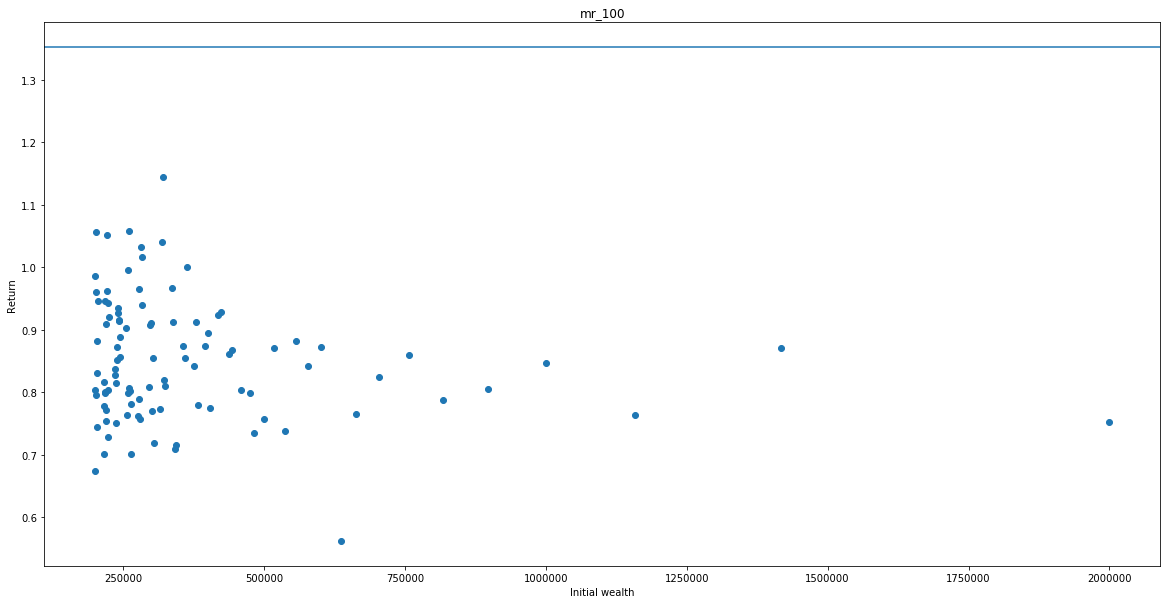

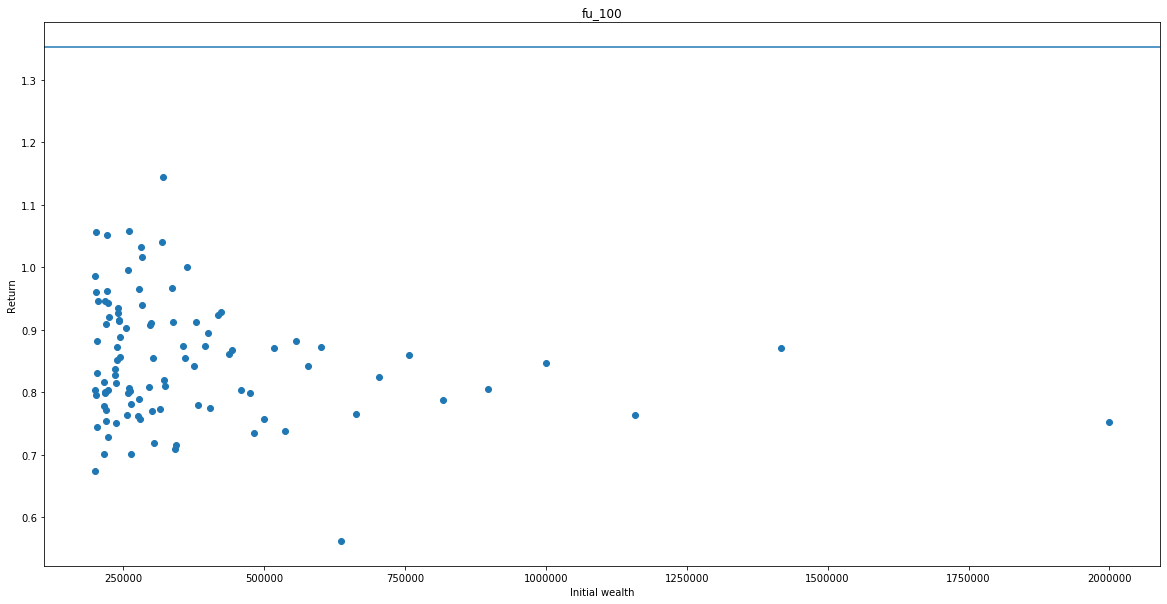

In [543]:
baseline_return = pow(1.01, 100) / 2
for group_name in group_names:
    plt.figure(figsize=(20, 10))
    plt.axhline(y = baseline_return)
    plt.scatter(agent[group_name]['initial_wealth_by_agent'], np.array(agent[group_name]['returns_by_agent']))
    plt.xlabel('Initial wealth')
    plt.ylabel('Return')
    plt.title(f"{group_name}")
    plt.show()

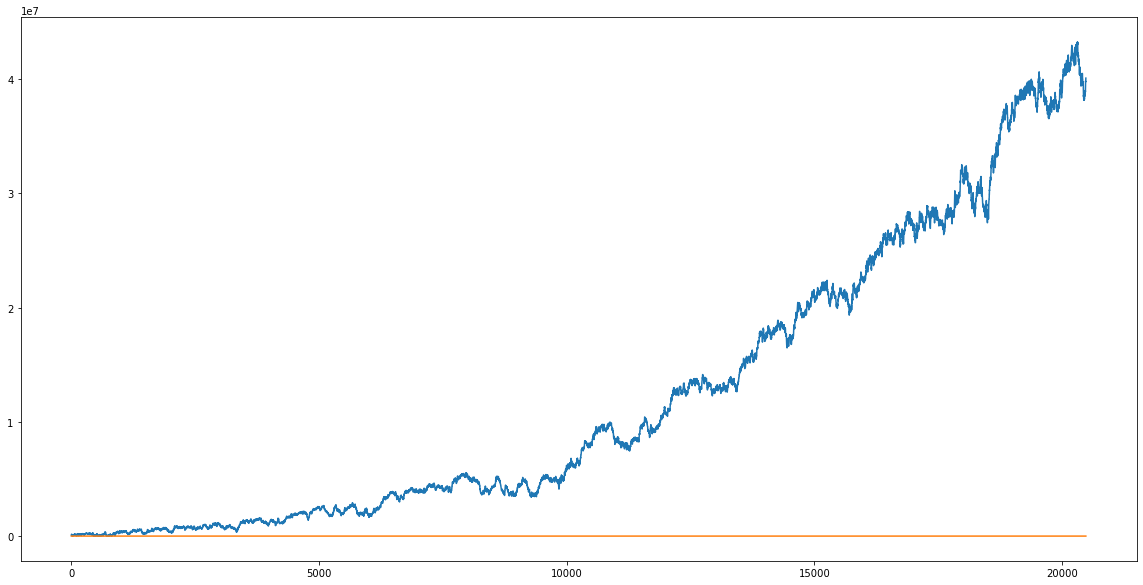

In [614]:
plt.figure(figsize=(20, 10))
plt.plot(agent[group_name]['CASH'])
plt.plot(agent[group_name]['TSMC'])

In [633]:
rl_path = Path("rl_result/timestep_10300/train")
rl_path = rl_path / "rl.json"
rl_orders = json.loads(rl_path.read_text())

In [676]:
bid_x, bid_y = [], []
ask_x, ask_y = [], []
bid_sizes, ask_sizes = [], []
bid_colors, ask_colors = [], []
base_size = 200
for order in rl_orders:
    if order['bid_or_ask'] == 'BID':
        if order['time'] > 5000 and order['time'] < 5100:
            bid_x.append(order['time'])
            bid_y.append(order['price'])
            bid_colors.append('r')
            bid_sizes.append(base_size * order['volume'])
    if order['bid_or_ask'] == 'ASK':
        if order['time'] > 5000 and order['time'] < 5100:
            ask_x.append(order['time'])
            ask_y.append(order['price'])
            ask_colors.append('g')  
            ask_sizes.append(base_size * order['volume'])

In [654]:
x[999:2001]

array([ 999, 1000, 1001, ..., 1998, 1999, 2000])

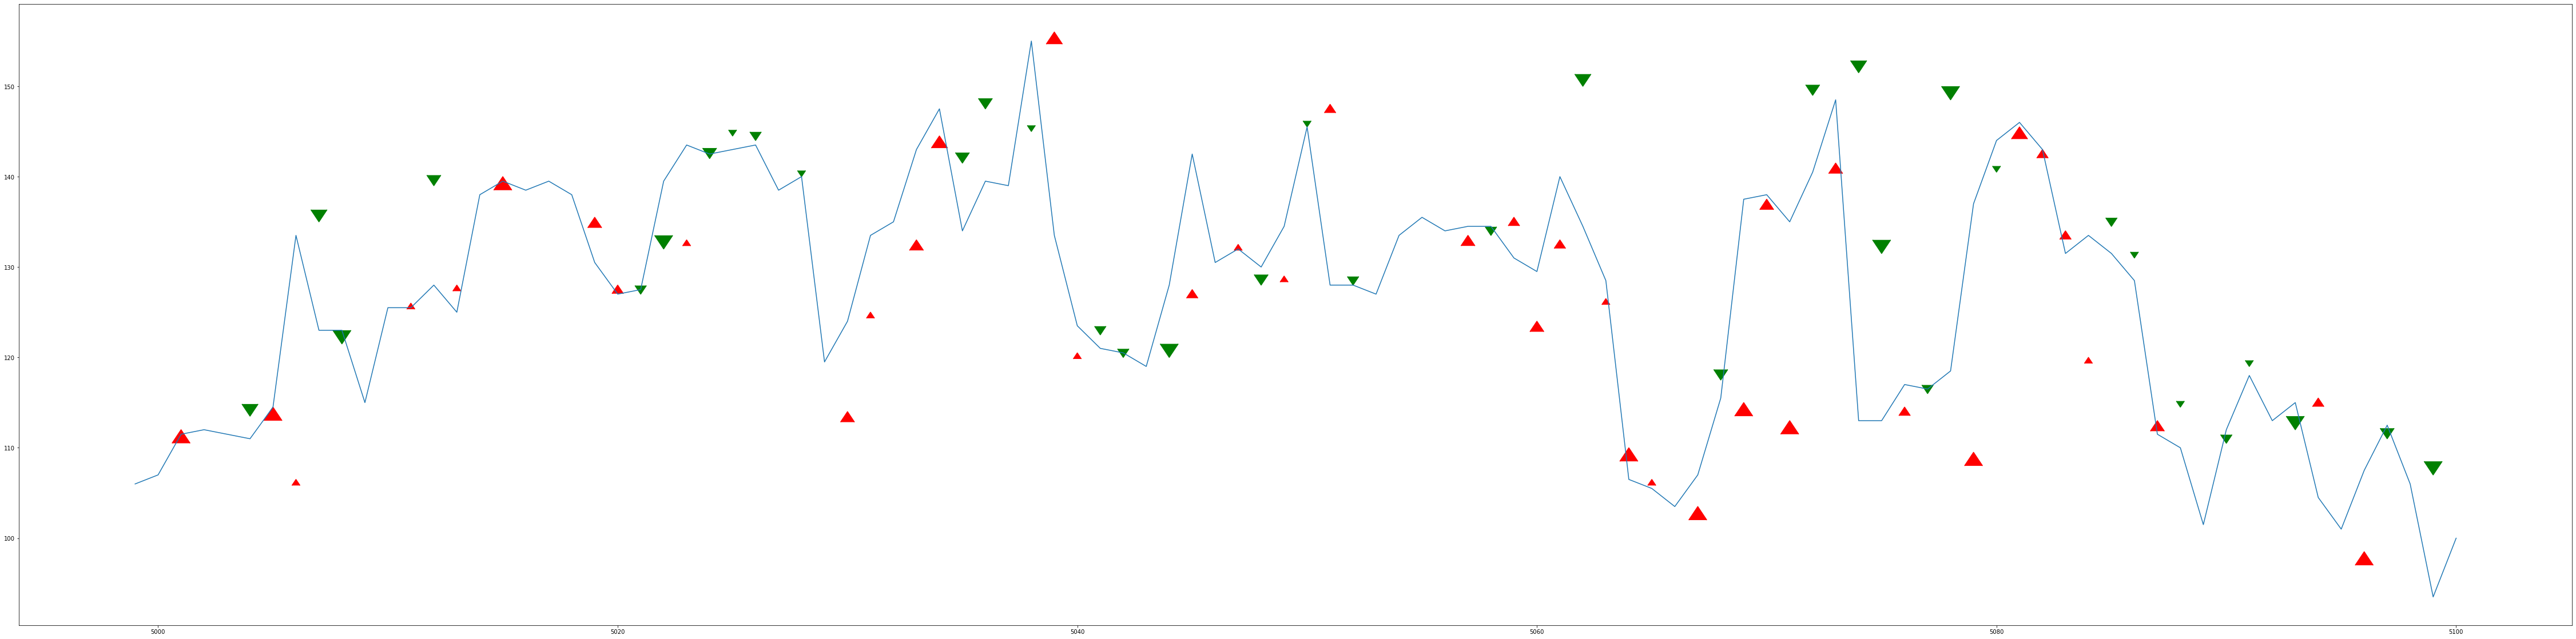

In [678]:
x = np.arange(len(tsmc['close']))
plt.figure(figsize=(80, 20))
plt.plot(x[4999: 5101], tsmc['close'][4999:5101])
plt.scatter(bid_x, bid_y, s = bid_sizes, c = bid_colors, marker = 6)
plt.scatter(ask_x, ask_y, s = ask_sizes, c = ask_colors, marker = 7)
plt.show()